In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice

#### User inputs of lat, lon and month

In [2]:
spill_month   = 9
ais_data_year = 2018
spill_lat     = -128.66497
spill_lon     = 51.02318
tiff_dir      = "/Users/rmueller/Documents/UBC/MIDOSS/Data/AIS/ShipTrackDensityGeoTIFFs/"
vessel_types  = ["tanker", "atb", "barge", "cargo", "cruise",
                 "ferry", "fishing", "smallpass", "other"]


#### load raster images
All geotiffs are named as: "vesseltype_yyyy_mm.tif"

In [3]:
tiff_name=[]
for name in vessel_types:
    tiff_name.append(f'{name}_{ais_data_year}_{spill_month:02.0f}.tif')

In [4]:
tiff_name

['tanker_2018_09.tif',
 'atb_2018_09.tif',
 'barge_2018_09.tif',
 'cargo_2018_09.tif',
 'cruise_2018_09.tif',
 'ferry_2018_09.tif',
 'fishing_2018_09.tif',
 'smallpass_2018_09.tif',
 'other_2018_09.tif']

In [37]:
filepath = tiff_dir + tiff_name[0]
with rio.open(filepath) as src:
    print(src.profile)
    no_data = src.nodata
    height = src.height
    width  = src.width
    transform = src.transform

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 620, 'height': 407, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.015030558980347124, 0.0, -130.53079574970752,
       0.0, -0.015030558980347136, 52.42397925731429), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [41]:
transform[2]

-130.53079574970752

In [34]:
-130.53079574970752 + 0.015030558980347124 * width

-121.2118491818923

In [36]:
52.42397925731429 + -0.015030558980347136 * height

46.30654175231301

In [30]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rio.open(filepath) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = 1
    print('Decimation factor= {}'.format(oview))
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    #thumbnail = src.read(1, out_shape=(1, int(src.height), int(src.width)))

Decimation factor= 1


In [31]:
type(thumbnail)
thumbnail[thumbnail==no_data]=np.nan
thumbnail[thumbnail==0]=np.nan

(300.0, 200.0)

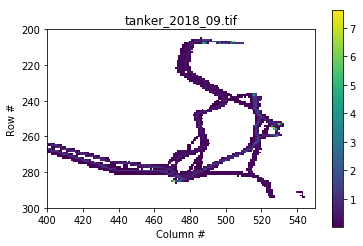

In [33]:
plt.imshow(thumbnail)
plt.colorbar()
plt.title(tiff_name[0])
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.xlim(400/oview,550/oview)
plt.ylim(300/oview,200/oview)

#### Use lat/lon points to identify raster index corresponding to location

#### Get vessel time exposure numbers for all vessel types at any given location

#### select vessel type by vessel time exposure 